# Part 1

In [ ]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/test.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,18,64,115,True
3,3,108,282,18,67,125,True
4,4,136,286,35,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
df.columns

Index(['Unnamed: 0', 'Birth Weight', 'Gestational Days', 'Maternal Age',
       'Maternal Height', 'Maternal Pregnancy Weight', 'Maternal Smoker'],
      dtype='object')

In [14]:
df1 = df[['Maternal Age', 'Maternal Smoker']]

In [15]:
df1

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,18,True
3,18,True
4,35,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


##Q1)Draw the histograms of the two distributions in the sample(1).

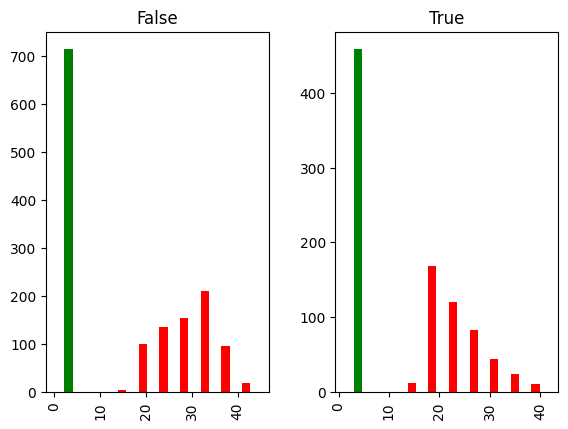

In [21]:
df1.hist(by = 'Maternal Smoker', color = ['red', 'green'])
plt.show()

##Q2) Choose a suitable statistical test and State the Null and Alternative Hypothesis (2).

I chose A/B testing for statistical analysis because It gives whether two numerical samples are from the same distributions. Here, we have to decided the average age of mothers based on the smoking behaviours.

NULL HYPOTHESIS : The difference in the sample is due to chance. In the population, the distribution of age of pregnant mothers is the same for non-smoker mothers as for mothers who do.

ALTERNATIVE HYPOTHESIS : In the population, the mothers who smoke have a
lesser age, on average, than the non-smokers.

##Q3) Choose the statistic to apply for this case(1).

Test Statistics
The alternative hypothesis compares the average age of the two groups and concludes that the average for the mothers who smoke is smaller.

Therefore it is reasonable to use the difference between the two group means as our statistic.

We will do the subtraction in the order "average age of the non-smoking group - average age of the smoking group". Large values of this
statistic will favor the alternative hypothesis


##Q4)State the observed statistic(1).

In [22]:
smoke = df['Maternal Age'][df['Maternal Smoker'] == True]
smoke

2       18
3       18
8       30
10      19
11      18
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [23]:
nonsmoke = df['Maternal Age'][df['Maternal Smoker'] == False]
nonsmoke

0       27
1       33
4       35
5       33
6       40
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

In [24]:
avg_age = df.groupby('Maternal Smoker').mean()
avg_age

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
Maternal Smoker,,,,,,
False,584.900699,123.085315,279.874126,29.686713,64.013986,129.47972
True,588.991285,113.819172,277.897603,24.193900,64.104575,126.91939


In [26]:
changes = avg_age['Maternal Age'][0] - avg_age['Maternal Age'][1]
print("The difference between the mean of the age of the mothers : ", changes)

The difference between the mean of the age of the mothers :  5.4928135045782085


##Q5)Simulate the test statistic under the Null that will help make the decision(3).

In [36]:
sample_dataf = df.sample(1174, replace=False)
sample_dataf.sample(3)

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
1148,1148,144,283,25,66,140,False
1112,1112,82,270,21,65,150,True
225,225,111,278,21,62,125,False


In [37]:
sample_age = sample_dataf['Maternal Age']
sample_age

872     26
555     36
1097    23
265     27
72      21
        ..
79      35
897     26
900     36
986     34
1101    19
Name: Maternal Age, Length: 1174, dtype: int64

In [38]:
new_dataf = df.assign(sample_age = sample_age.values)
new_dataf.tail(4)

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,sample_age
1170,1170,128,265,24,67,120,False,26
1171,1171,130,291,30,65,150,True,36
1172,1172,125,281,21,65,110,False,34
1173,1173,117,297,38,65,129,False,19


In [44]:
expected = np.zeros(4000)
simulations = 4000

for i in range(simulations):
  sample_dataf = df1.sample(1174,replace = False)
  sample_age = sample_dataf['Maternal Age']
  new_dataf = df1.assign(sample_age = sample_age.values)
  new_avg_age= new_dataf.groupby('Maternal Smoker').mean()
  exp = new_avg_age['sample_age'][0]- new_avg_age['sample_age'][1]
  expected[i] = exp

In [45]:
expected

array([-0.28086902,  0.92824169,  0.14124655, ...,  0.20563706,
        0.21994607,  0.01246553])

In [46]:
expected_dataf = pd.DataFrame(expected)
expected_dataf.tail(4)

,0
3996,-0.080543
3997,0.205637
3998,0.219946
3999,0.012466


##Q6)State the outcome of the hypothesis test(1).


The distribution is centered around 0. Since under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should also be around 0.

The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. Because, our observed value is present at the tail of the histogram.

The data supports the alternative more than the null hypothesis.

The average age of the mothers who smoke is less than the average age of the non-smokers.

##Q7)Draw a histogram to depict what the model of random selection predicts about the statistic(1).

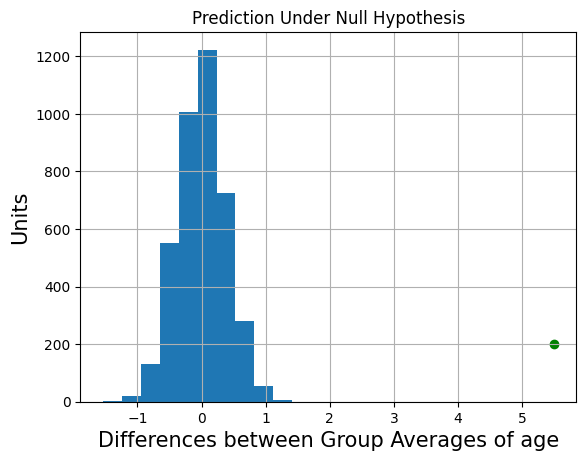

In [51]:
import matplotlib.pyplot as plt
expected_dataf.hist()
plt.title('Prediction Under Null Hypothesis');
plt.xlabel('Differences between Group Averages of age',fontsize=15)
plt.ylabel('Units',fontsize=15)

plt.scatter(changes,200, color='green')
plt.show()

#Part 2

##Q8)State the Null and Alternative Hypothesis (1).

NULL HYPOTHESIS: The difference in the sample is due to chance.The percentages of blood groups among a certain aboriginal population is same as that observed from among the rest of the world population.



ALTERNATE HYPOTHESIS: The percentages of blood groups among a certain aboriginal population is different from that observed from among the rest of the world population, as the percentage of rare blood group is more.


##Q9)Choose the statistic to apply for this case(2).

I prefer to use z-test with the p-value. The sample is greater than 30 (n>30).
Finding the p-value will give a clear idea on the diversity og blood groups.
The difference between the expected and observed value and state the valid hypothesis as the conclusion.

In [54]:
data = [['O+', 42, 35], ['A+', 31, 30], ['B+', 15, 13], ['AB+', 5, 8], ['Others', 7, 14]]

df1 = pd.DataFrame(data, columns=['Blood Type', 'World population(percentage)', 'Aboriginal population(percentage)'])
df1

,Blood Type,World population(percentage),Aboriginal population(percentage)
0,O+,42,35
1,A+,31,30
2,B+,15,13
3,AB+,5,8
4,Others,7,14


##Q10)State the observed statistic(2).

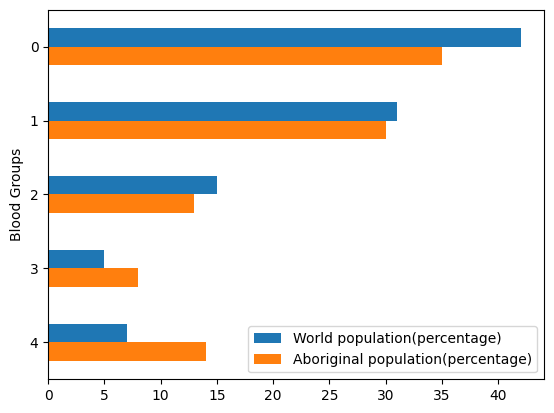

In [55]:
df1.plot.barh()
plt.ylabel('Blood Groups')
plt.gca().invert_yaxis()

##Q11)Simulate the test statistic under the Null that will help make the decision(2).

In [56]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [57]:
def table_tvd(table, first, second):
    return total_variation_distance(table[first], table[second])

observed_stat =table_tvd(df1, 'World population(percentage)', 'Aboriginal population(percentage)')
print(observed_stat)


10.0


In [59]:
arr = np.random.binomial(1568, [0.42, 0.31, 0.14, 0.05, 0.07])
arr

array([629, 467, 210,  69, 112])

In [60]:
df1

,Blood Type,World population(percentage),Aboriginal population(percentage)
0,O+,42,35
1,A+,31,30
2,B+,15,13
3,AB+,5,8
4,Others,7,14


In [61]:
population = 1568
simulations = 5000

tvd_list=[]
for i in np.arange(simulations):
    df1["Random Sample"]=(np.random.binomial(1568,[0.42, 0.31, 0.14, 0.05, 0.07]))/population
    tvd_list.append(table_tvd(df1, 'World population(percentage)', 'Random Sample'))

tvd_list

[49.507971938775505,
 49.5031887755102,
 49.511798469387756,
 49.515943877551024,
 49.51913265306122,
 49.51562500000001,
 49.5188137755102,
 49.538265306122454,
 49.51785714285714,
 49.4952168367347,
 49.50669642857143,
 49.49872448979591,
 49.51052295918368,
 49.51913265306122,
 49.495535714285715,
 49.52040816326531,
 49.49713010204082,
 49.503507653061234,
 49.52710459183674,
 49.50892857142858,
 49.49744897959184,
 49.50318877551021,
 49.485969387755105,
 49.51211734693877,
 49.50733418367347,
 49.49872448979592,
 49.5095663265306,
 49.51913265306122,
 49.5108418367347,
 49.5,
 49.50956632653062,
 49.49330357142858,
 49.502869897959194,
 49.501594387755105,
 49.51817602040818,
 49.50669642857143,
 49.51626275510205,
 49.4952168367347,
 49.49457908163266,
 49.52200255102041,
 49.49170918367347,
 49.509247448979586,
 49.49808673469387,
 49.51211734693877,
 49.4939413265306,
 49.50095663265306,
 49.51530612244898,
 49.501594387755105,
 49.490114795918366,
 49.48979591836735,
 49.5114

In [62]:
df2=pd.DataFrame(tvd_list)
df2.rename(columns={0:"TVD"},inplace=True) # renaming column
df2.tail(10)


,TVD
4990,49.518176
4991,49.493622
4992,49.515625
4993,49.514987
4994,49.503508
4995,49.505421
4996,49.515625
4997,49.484694
4998,49.500319
4999,49.505740


##Q12)What is the outcome of your analysis? (1)

###INFERENCE
From the above classification of Blood groups, the histogram plotted and the observed value have a lot of difference and the observed value is far from the random sample, therefore it supports more to the alternate hypothesis than the null hypothesis. So, we can reject the null hypothesis and conclude that the aboriginal population's blood samples are different from the rest of the world by some means.

##Q13)Draw a histogram to depict what the model of random selection predicts about the statistic.(2)

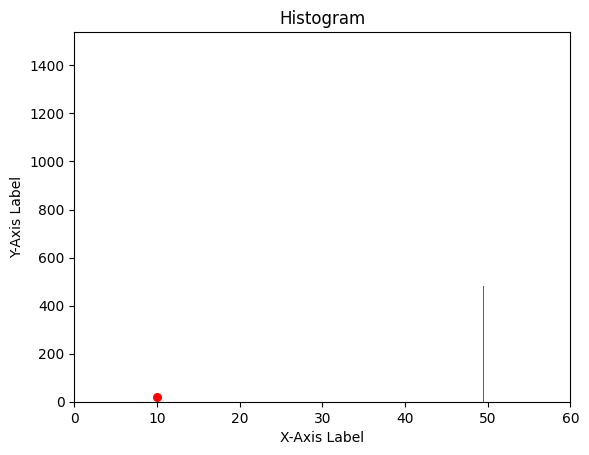

In [65]:
plt.hist(df2)

plt.xlim(0, 60)

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Histogram')

plt.scatter(observed_stat, 20, color='red', s=30)

In [2]:
import numpy as np

In [3]:
a1 = np.random.rand(4)
a2 = np.random.rand(4, 1)
a3 = np.array([[1, 2, 3, 4]])
a4 = np.arange(1, 4, 1)
a5 = np.linspace(1 ,4, 4)

In [4]:
a3.shape == a4.shape

False

In [5]:
a4.ndim() == 1

TypeError: 'int' object is not callable

In [6]:
a1.shape == a2.shape

False

In [7]:
a5.shape == a1.shape

True

In [8]:
import numpy as np

old = np.array([[1, 1, 1], [1, 1, 1]])
new = old
new[0, :2] = 0

print(old)

[[0 0 1]
 [1 1 1]]


In [9]:
import re
s = 'ACBCAC'

In [10]:
import re
s = 'ACBCAC'

In [12]:

re.findall('[^A]C', s)


['BC']

In [13]:

re.findall('AC', s)


['AC', 'AC']

In [14]:

re.findall('^AC', s)

['AC']

In [15]:


re.findall('^[AC]', s)

['A']

In [16]:
import re
s = 'ACAABAACAAAB'
result = re.findall('A{1,2}', s)
L = len(result)

In [17]:
L

5

In [20]:
text=r'''Everyone has the following fundamental freedoms:
    (a) freedom of conscience and religion;
    (b) freedom of thought, belief, opinion and expression, including freedom of the press and other media of communication;
    (c) freedom of peaceful assembly; and
    (d) freedom of association.'''

In [22]:
import re
pattern = ('freedom')
print(len(re.findall(pattern,text)))

6


In [24]:
import re
pattern = ('\(.\)')
print(len(re.findall(pattern,text)))

4


In [26]:
import re

text = '''Everyone has the following fundamental freedoms:
(a) freedom of conscience and religion;
(b) freedom of thought, belief, opinion and expression, including freedom of the press and other media of communication;
(c) freedom of peaceful assembly; and
(d) freedom of association.'''

pattern = 'freedom'
count = len(re.findall(pattern, text))

print(count)


6
